In [2]:
import csv
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
filename = '/Users/Hitesh Aryan Acharya/Desktop/OnlineClass/3-1/FoDS/insurance_dataset.csv'
ds = pd.read_csv(filename)

In [3]:
mean1 = int(ds['age'].mean())
mean2 = int(ds['bmi'].mean())
mean3 = int(ds['children'].mean())
mean4 = int(ds['charges'].mean())
print(mean1, mean2, mean3, mean4)
std1 = int(ds['age'].std())
std2 = int(ds['bmi'].std())
std3 = int(ds['children'].std())
std4 = int(ds['charges'].std())
print(std1, std2, std3, std4)

39 30 1 13270
14 6 1 12110


In [4]:
ds['age'] = (ds['age']-mean1)/std1
ds['bmi'] = (ds['bmi']-mean2)/std2
ds['children'] = (ds['children']-mean3)/std3
ds['charges'] = (ds['charges']-mean4)/std4
ds.head()

,age,bmi,children,charges
0,-1.428571,-0.350000,-1.0,0.298507
1,-1.500000,0.628333,0.0,-0.953299
2,-0.785714,0.500000,2.0,-0.728368
3,-0.428571,-1.215833,-1.0,0.719609
4,-0.500000,-0.186667,-1.0,-0.776478


In [37]:
def randomS():    
    dsR = ds.sample(frac = 1)
    train_ds_count = int(0.7 * len(dsR))
    train_ds, test_ds = dsR[:train_ds_count], dsR[train_ds_count:]
    x0 = np.ones(train_ds_count, dtype = int)
    x1, x2, x3, y_train = train_ds['age'], train_ds['bmi'], train_ds['children'], train_ds['charges']
    x0_test, x1_test, x2_test, x3_test, y_test = np.ones(len(dsR) - train_ds_count, dtype = int), test_ds['age'], test_ds['bmi'], test_ds['children'], test_ds['charges']
    X = np.array([x0, x1, x2, x3])
    X_test = np.array([x0_test, x1_test, x2_test, x3_test])
    y_train, y_test = y_train.reset_index(drop=True), y_test.reset_index(drop=True)
    return X, X_test, y_train, y_test, train_ds_count
    
def normalE():
    X, X_test, y_train, y_test, train_ds_count = randomS()
    W_normal = np.dot(np.linalg.inv(np.dot(X, X.T)), np.dot(X, y_train))
    costN = (1/(2*train_ds_count)*np.sum(np.square(np.dot(X.T, W_normal) - y_train)))
    
    costN_test = (1/(2*(len(ds) - train_ds_count))*np.sum(np.square(np.dot(X_test.T, W_normal) - y_test)))
    #print(costN_test, costN)
    return W_normal, costN, costN_test

iterations = 1000

def gradientD(d, learn_rate):
    X, X_test, y_train, y_test, train_ds_count = randomS()
    W_GD = np.zeros(4)
    costsGD = []
    for i in range(iterations):    
        delEGD = np.dot(np.dot(X.T, W_GD) - y_train, X.T)
        costGD = (1/(2*train_ds_count)*np.sum(np.square(np.dot(X.T, W_GD) - y_train)))
        costsGD.append(costGD)
        if(d and i % 50 == 0):
            print(costGD)
        W_GD -= learn_rate*delEGD
        
    costGD_test = (1/(2*(len(ds) - train_ds_count))*np.sum(np.square(np.dot(X_test.T, W_GD) - y_test)))
    #print(costGD_test, costsGD[-1])
    return W_GD, costsGD, costGD_test


def stochasticGD(d, learn_rate):
    X, X_test, y_train, y_test, train_ds_count = randomS()
    W_SGD = np.zeros(4)
    costsSGD = []
    
    for i in range(iterations):
        p = random.randrange(0, train_ds_count)
        delESGD = np.dot(np.dot(X.T[p], W_SGD) - y_train[p], X.T[p])
        costSGD = (1/(2*train_ds_count)*np.sum(np.square(np.dot(X.T, W_SGD) - y_train)))
        costsSGD.append(costSGD)
        if(d and i % 50 == 0):
            print(costGD)
        W_SGD -= learn_rate*delESGD
    
    costSGD_test = (1/(2*(len(ds) - train_ds_count))*np.sum(np.square(np.dot(X_test.T, W_SGD) - y_test)))
    #print(costSGD_test, costsSGD[-1])
    return W_SGD, costsSGD, costSGD_test

learn_rate = 0.001
#print(normalE())
#print(gradientD(False, learn_rate))
#print(stochasticGD(False, learn_rate))

In [38]:
#for i in range(20):
#wN, cN, cN_test = normalE()
#wGD, cGD, cGD_test = gradientD(False, learn_rate) 
#wSGD, cSGD, cSGD_test = stochasticGD(False, learn_rate)

C:\Users\Hitesh Aryan Acharya\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in square


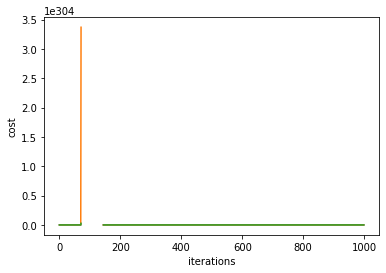

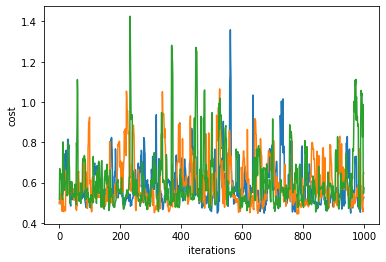

In [39]:
learning_rates = [0.1, 0.01, 0.001]
def plotGD():
    for i in learning_rates:
        wGD, cGD, cGD_test = gradientD(False, 0.1)
        plt.plot(cGD)
        
    plt.ylabel('cost')
    plt.xlabel('iterations')
    
    #legend = plt.legend(loc='upper center', shadow=True)
    #frame = legend.get_frame()
    #frame.set_facecolor('0.90')
    plt.show()
plotGD()

def plotSGD():
    for i in learning_rates:
        wSGD, cSGD, cSGD_test = stochasticGD(False, 0.1)
        plt.plot(cSGD)
        
    plt.ylabel('cost')
    plt.xlabel('iterations')
    
    #legend = plt.legend(loc='upper center', shadow=True)
    #frame = legend.get_frame()
    #frame.set_facecolor('0.90')
    plt.show()
plotSGD()